In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Derivatives**

In [2]:
class df_1:        
    def __call__(self, x_0, h, f):
        return  (f(x_0 + h) - f(x_0)) / h

    def name(self):
        return 'формула (2)'

class df_2:    
    def __call__(self, x_0, h, f):
        return  (f(x_0) - f(x_0 - h)) / h
    
    def name(self):
        return 'формула (3)'

class df_3:    
    def __call__(self, x_0, h, f):
        return  (f(x_0 + h) - f(x_0 - h)) / (2*h)

    def name(self):
        return 'формула (4)'

class df_4:    
    def __call__(self, x_0, h, f):
        return  4./3 * (f(x_0 + h) - f(x_0 - h)) / (2*h) \
                - 1./3 * (f(x_0 + 2*h) - f(x_0 - 2*h)) / (4*h)
    
    def name(self):
        return 'формула (5)'
    
class df_5:    
    def __call__(self, x_0, h, f):
        return  3./2 * (f(x_0 + h) - f(x_0 - h)) / (2*h) \
                - 3./5 * (f(x_0 + 2*h) - f(x_0 - 2*h)) / (4*h) \
                + 1./10 * (f(x_0 + 3*h) - f(x_0 - 3*h)) / (6*h)

    def name(self):
        return 'формула (6)'

**Functions**

In [3]:
class sin_sqr:
    def __call__(self, x):
        return np.sin(x ** 2)

    def derivative(self, x):
        return 2. * x * np.cos(x ** 2)
    
    def name(self):
        return 'sin(x^2)'
    
class cos_sin:
    def __call__(self, x):
        return np.cos(np.sin(x))

    def derivative(self, x):
        return np.sin(np.sin(x)) * (-np.cos(x))
    
    def name(self):
        return 'cos(sin(x)'
    
class exp_sin_cos:
    def __call__(self, x):
        return np.exp(np.sin(np.cos(x)))

    def derivative(self, x):
        return np.sin(x) * np.cos(np.cos(x)) * (-np.exp(np.sin(np.cos(x))))
    
    def name(self):
        return 'exp(sin(cos(x))'
    
class ln_add_3:
    def __call__(self, x):
        return np.log(x + 3)
    
    def derivative(self, x):
        return 1. / (x + 3)
    
    def name(self):
        return 'ln(x+3)'
    
class sqrt_add_3:
    def __call__(self, x):
        return np.sqrt(x + 3)
    
    def derivative(self, x):
        return 0.5 / np.sqrt(x + 3)
    
    def name(self):
        return '(x+3)^0.5'

In [4]:
# plot dependence of the absolute error on the grid step
def pipeline(function, derivatives, x_0, grid):
    dfs = function.derivative(np.array([x_0]*len(grid)))
    
    fig, axes = plt.subplots(len(derivatives), figsize=(7,20))
    for i, axis in enumerate(axes.flat):
        log_AE = np.log(np.absolute(dfs - derivatives[i](x_0, grid, function)))
        
        axis.set_title('function: {}  method: {}'.format(function.name(), derivatives[i].name()))
        axis.set_xlabel('log(step)')
        axis.set_ylabel('log(AbsoluError)')
        axis.scatter(y=log_AE, x=np.log(grid))
        
    plt.tight_layout()

In [5]:
derivatives = np.array([df_1(), df_2(), df_3(), df_4(), df_5()])
x_0 = 5.
grid = np.array([1 / 2.**(i-1) for i in range(1,22)])

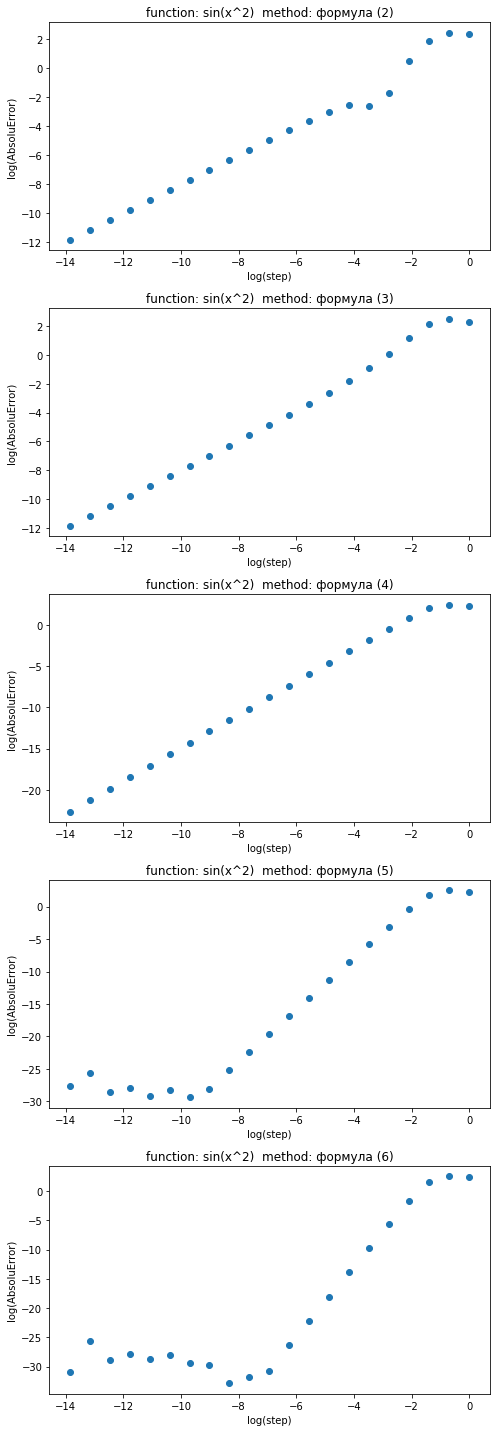

In [6]:
pipeline(sin_sqr(), derivatives, x_0, grid)

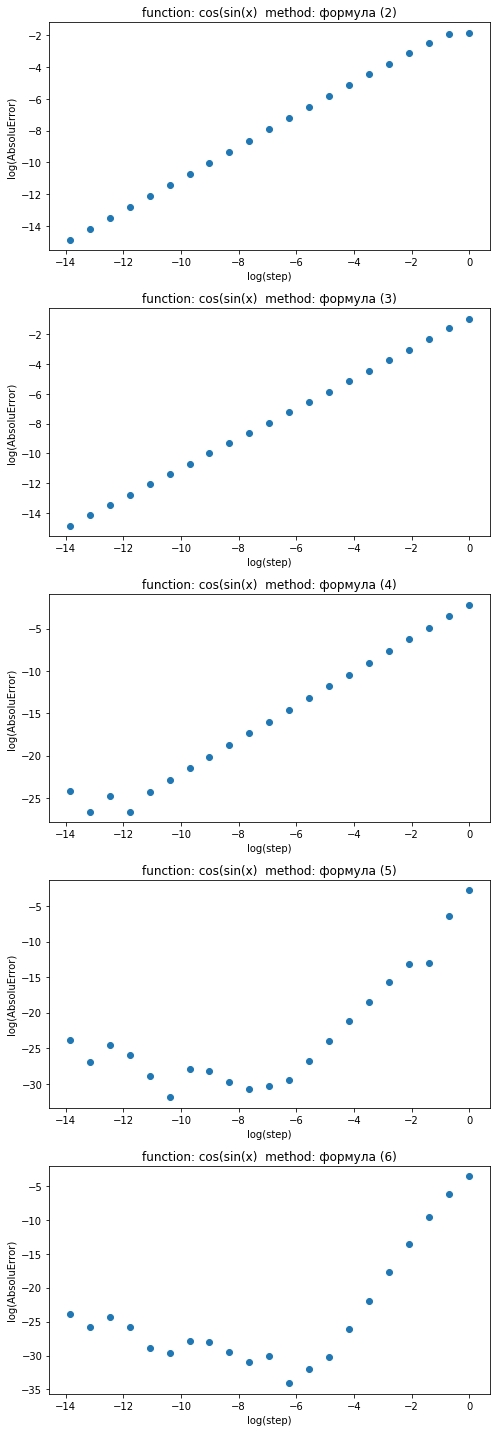

In [7]:
pipeline(cos_sin(), derivatives, x_0, grid)

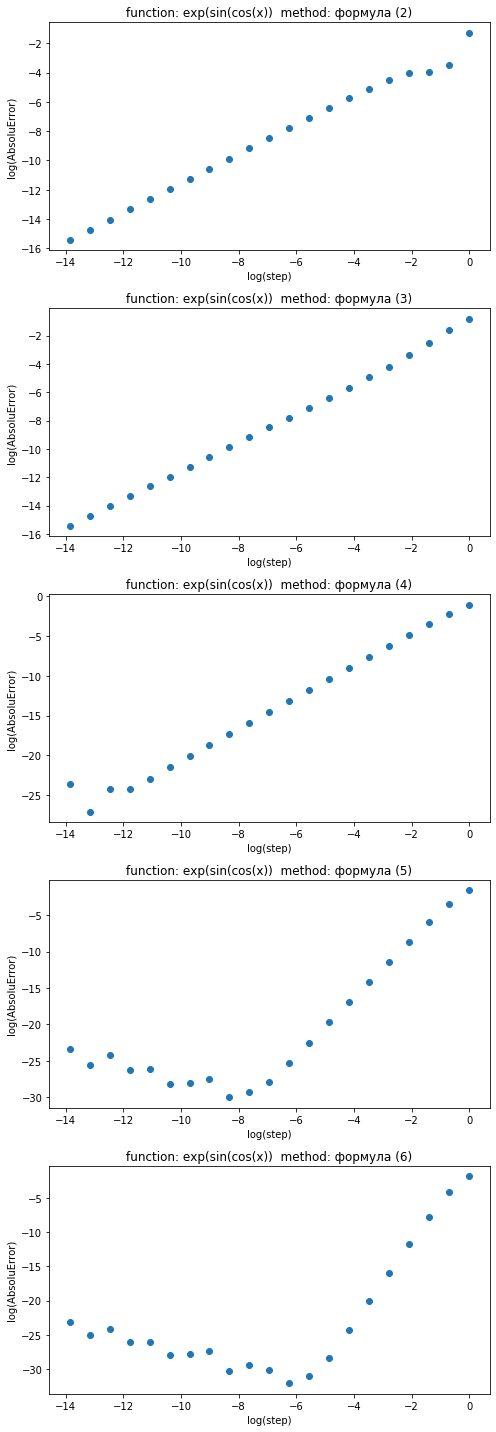

In [8]:
pipeline(exp_sin_cos(), derivatives, x_0, grid)

/home/archie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


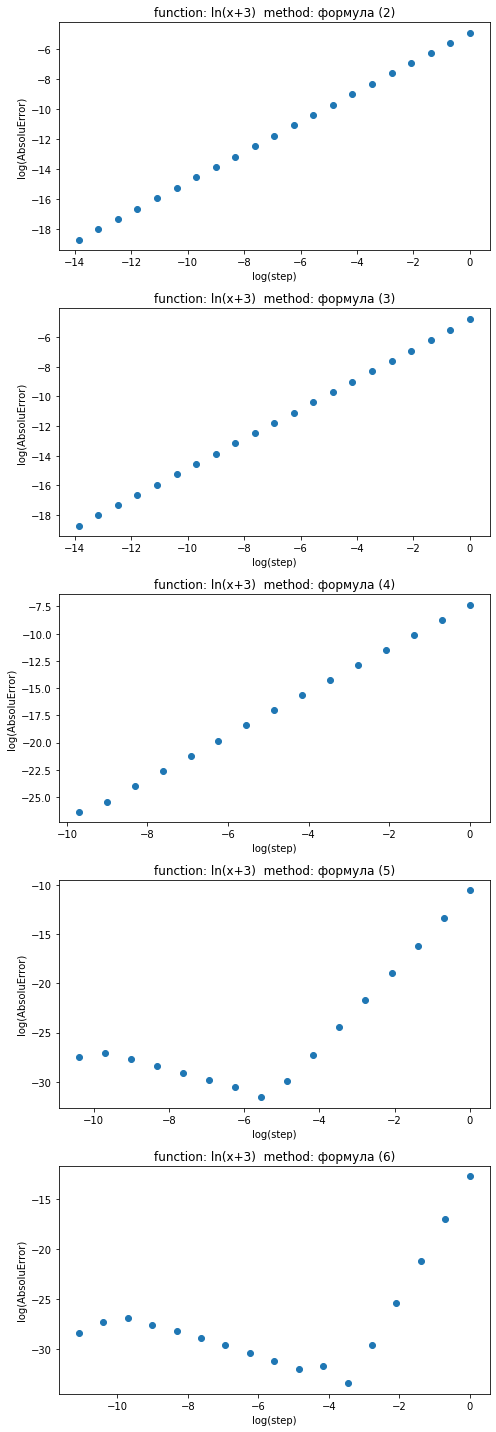

In [9]:
pipeline(ln_add_3(), derivatives, x_0, grid)

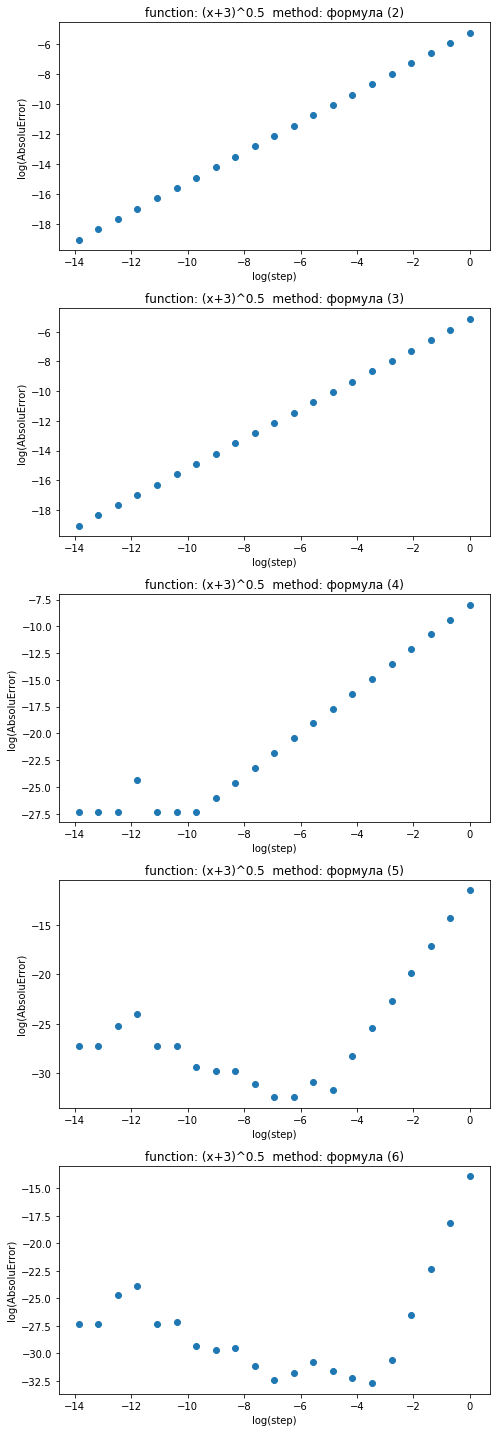

In [10]:
pipeline(sqrt_add_3(), derivatives, x_0, grid)